# Introduction to QuTiP
Contact: Nathan Shammah nathan.shammah@gmail.com

You can find this notebook at https://github.com/nathanshammah/interactive-notebooks

**Run this notebook live** at https://mybinder.org/v2/gh/nathanshammah/interactive-notebooks/binder

This notebook has been developed for the interactive lecture on [QuTiP](qutip.org) for the [iTHEMS](https://ithems.riken.jp/en/events/quantum-physics-and-science-with-open-source-software-qutip-the-quantum-toolbox-in-python) Quantum Computing and Information (QCoIn) working group.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.3.1
Numpy Version:      1.15.4
Scipy Version:      1.2.1
Cython Version:     0.29.8
Matplotlib Version: 3.1.0
Python Version:     3.7.3
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Darwin (x86_64)
Installation path:  /miniconda3/lib/python3.7/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex file can be easily generated using `qutip.cite()`


## Quantum Objects

### Operators and kets

In [3]:
# Let's define a quantum object. We can start from a simple 
# bosonic destruction operator
n_max = 2
a = destroy(n_max)

In [4]:
a

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

In [5]:
# in QuTiP, all number (Fock) states are defined on the "basis". 
psi0 = basis(n_max)

In [6]:
psi0 # it's a ket!

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [7]:
a*psi0 # destroing the ground state gives the vacuum

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [0.]]

In [8]:
a.dag()*psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [9]:
psi0 = basis(n_max)
for n in range(1,n_max):
    print("n = ",n)
    psi = a.dag()*psi0/np.sqrt(n)
    print(psi)
    psi0 = psi
psi0 = basis(n_max)

n =  1
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


# Density matrix

In [10]:
rho0 = psi0*psi0.dag()
rho0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [11]:
rho1 = fock(n_max,1)*fock(n_max,1).dag()
rho1

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]

In [12]:
mixed = (rho0 + rho1)/2
mixed

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

In [13]:
# let's define the Schrodinger cat state
cat = fock(n_max,0)+fock(n_max,1)
cat = cat 
cat_rho = ket2dm(cat)/2
cat_rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

In [14]:
# trace Tr[rho]
print(cat_rho.tr())
print(mixed.tr())

1.0
1.0


In [15]:
# purity Tr[rho*rho]
print((cat_rho*cat_rho).tr())
print((mixed*mixed).tr())

1.0
0.5


## Hamiltonian

In [16]:
# We can now build a Hamiltonian, 
# that of the Quantum Harmonic Oscillator 
# exploring its features with QuTiP
n_max = 6
a = destroy(n_max)

H = a.dag()*a

In [17]:
H

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 5.]]

In [18]:
E_n , Psi_n = H.eigenstates()

In [19]:
E_n

array([0., 1., 2., 3., 4., 5.])

In [20]:
Psi_n

array([Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]], dtype=object)

In [21]:
g = .6
H_driven = a.dag()*a + g*(a + a.dag())
En_driven , Psin_driven = H_driven.eigenstates()

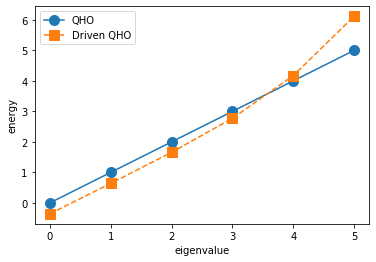

In [22]:
plt.figure()
plt.plot(E_n,"o-",markersize = 10, label="QHO")
plt.plot(En_driven,"s--",markersize = 10, label="Driven QHO")

plt.ylabel("energy")
plt.xlabel("eigenvalue")
plt.legend()
plt.show()
plt.close()

## Open Quantum System: Lindblad Master Equation

\begin{eqnarray}
\dot{\rho}&=&-i\lbrack H, \rho\rbrack +\kappa\left(a\rho a^\dagger - a^\dagger a\rho- \rho a^\dagger a\right)\\
\partial_t{\rho}&=&-i\lbrack H, \rho\rbrack +\kappa\mathcal{D}_{[a]}(\rho)
\end{eqnarray}

* Non-unitary dynamics: Non-Hermitian matrix,  $\partial_t{\rho}=\mathcal{L}\rho$
* Contractive map 
* Linear map

In [23]:
rho0 = ket2dm(basis(n_max,n_max-1))
t = np.linspace(0,30,300)
kappa = 0.1
results = mesolve(H,rho0,t,[kappa*a])
rho_t = results.states
rho_t[0]

rho_t[-1]

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0.00116956 0.         0.         0.         0.         0.        ]
 [0.         0.01671479 0.         0.         0.         0.        ]
 [0.         0.         0.09555111 0.         0.         0.        ]
 [0.         0.         0.         0.27311433 0.         0.        ]
 [0.         0.         0.         0.         0.39031997 0.        ]
 [0.         0.         0.         0.         0.         0.22313024]]

Let us consider a driven, lossy photonic cavity 

In [24]:
results = mesolve(H_driven,rho0,t,c_ops=[kappa*a], e_ops=[a,a.dag()*a])
at = results.expect[0]
nt = results.expect[1]

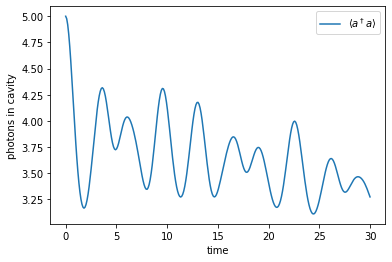

In [25]:
plt.figure()
plt.plot(t,nt,"-",markersize = 10, label="$\\langle a^\dagger a \\rangle$")
plt.ylabel("photons in cavity")
plt.xlabel("time")
plt.legend()
plt.show()
plt.close()

### Cavity QED: Qubit in a cavity

In [26]:
rho0qubit = ket2dm(basis(2,1))
rho0_tot = tensor(rho0,rho0qubit)
Om = 0.5
Hint_tot = Om*tensor(a+a.dag(),sigmax())
H0_tot = tensor(H,qeye(2))+tensor(qeye(n_max),sigmaz())
H_tot=H0_tot+Hint_tot
t = np.linspace(0,50,300)
kappa = 0.1
a_tot = tensor(a,qeye(2))
sz_tot = tensor(qeye(n_max),sigmaz())
sm_tot = tensor(qeye(n_max),sigmam())
results_tot = mesolve(H_tot,rho0_tot,t,
                      c_ops=[kappa*a_tot, kappa*sm_tot], 
                      e_ops= [a_tot.dag()*a_tot,sz_tot])
nphot_tot_t = results_tot.expect[0]
sz_tot_t = results_tot.expect[1]

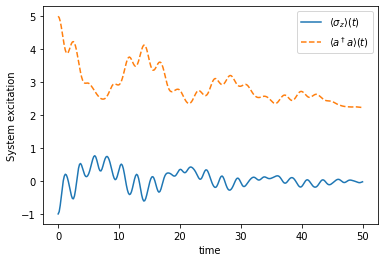

In [27]:
plt.figure()
plt.plot(t,sz_tot_t,"-",markersize = 10, 
         label="$\\langle \sigma_z \\rangle (t)$")
plt.plot(t,nphot_tot_t,"--",markersize = 10, 
         label="$\\langle a^\dagger a \\rangle (t)$")
plt.ylabel("System excitation")
plt.xlabel("time")
plt.legend()
plt.show()
plt.close()

## Bloch Sphere

We can visualize a state on the Bloch sphere. 

In [28]:
b = Bloch()

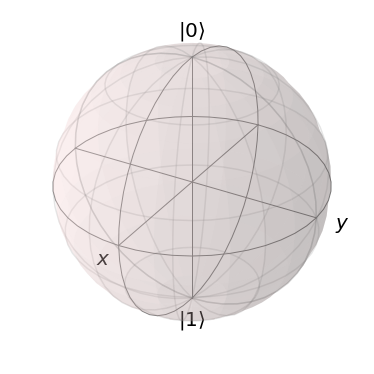

In [29]:
b.show()

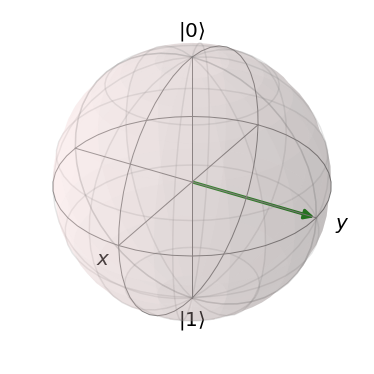

In [30]:
b2 = Bloch()
vec = [0,1,0]
b2.add_vectors(vec)
b2.render()

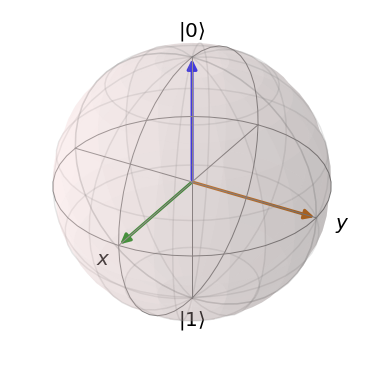

In [31]:
x = (basis(2,0)+(1+0j)*basis(2,1)).unit() 
y = (basis(2,0)+(0+1j)*basis(2,1)).unit()
z = (basis(2,0)+(0+0j)*basis(2,1)).unit() 
b3 = Bloch()      
b3.add_states([x,y,z])
b3.show()

## Wigner Function

You can find a Gallery of Wigner functions at qutip.org/tutorials and at R.J. Johansson's  http://github.com/jrjohansson/qutip-lectures

In [32]:
def plot_wigner_2d_3d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner(psi, fig=fig, ax=ax, alpha_max=6);

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    plot_wigner(psi, fig=fig, ax=ax, projection='3d', alpha_max=6);
    
    plt.close(fig)
    return fig

###  Coherent state $|\psi\rangle=|\alpha\rangle$

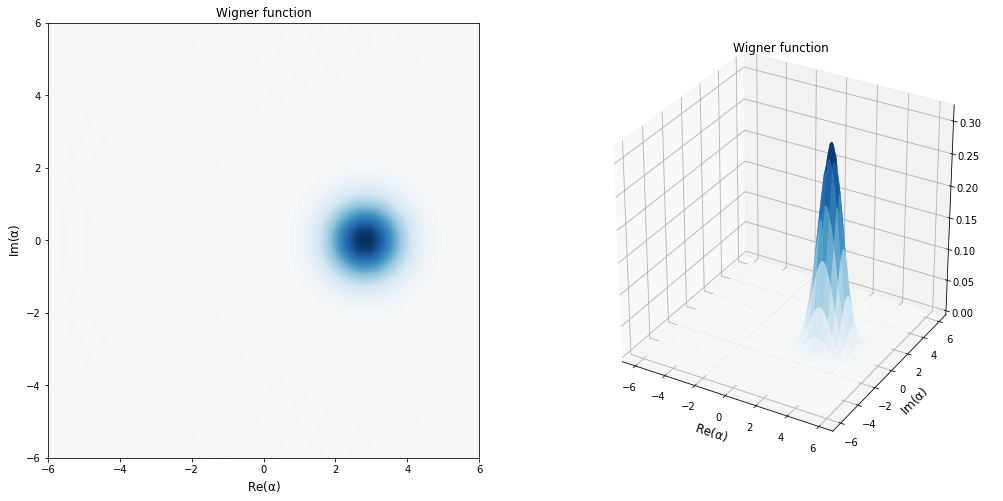

In [34]:
N = 30
psi = coherent(N, 2.0)
plot_wigner_2d_3d(psi)

### Schrödinger Cat state $|\psi\rangle=\frac{1}{\sqrt{2}}(|\alpha\rangle+|-\alpha\rangle)$

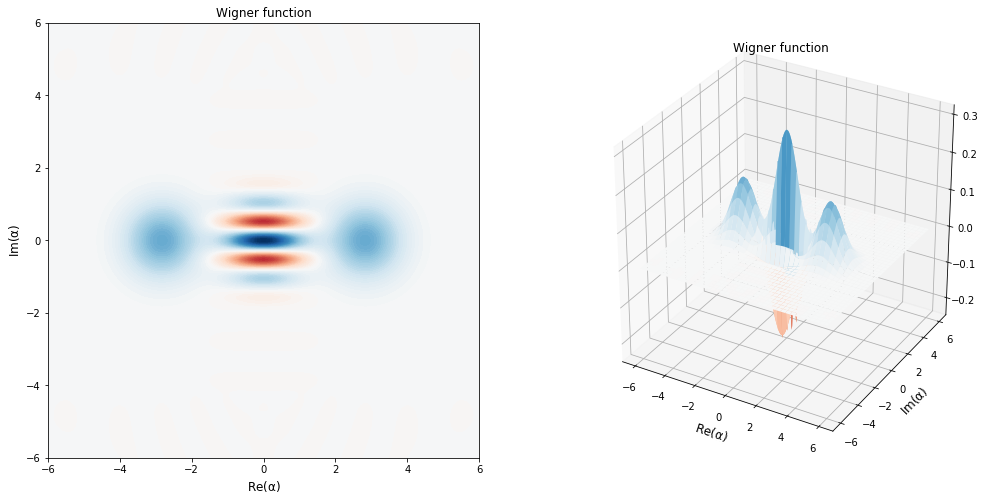

In [35]:

psi = (coherent(N, -2.0) + coherent(N, 2.0)) / np.sqrt(2)
plot_wigner_2d_3d(psi)


### Squeezed state

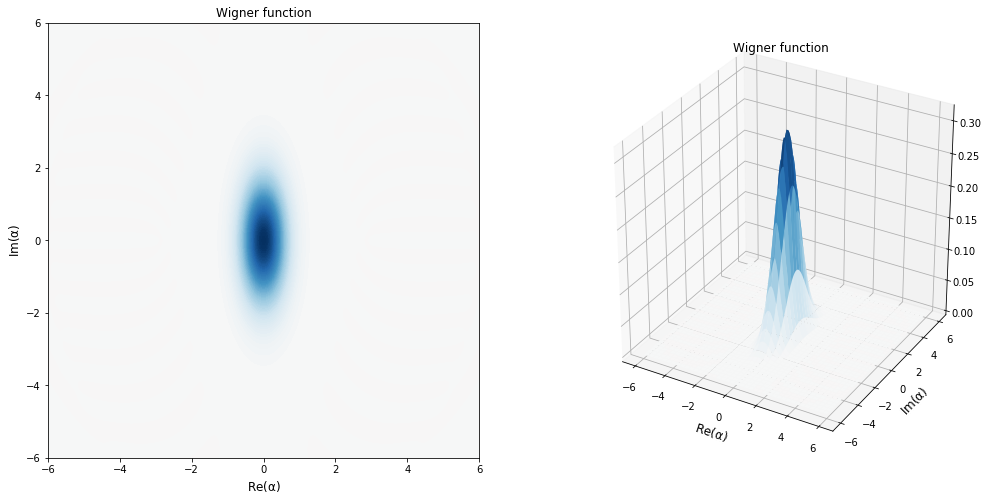

In [36]:
psi = squeeze(N, 0.5) * basis(N, 0)
display(plot_wigner_2d_3d(psi))

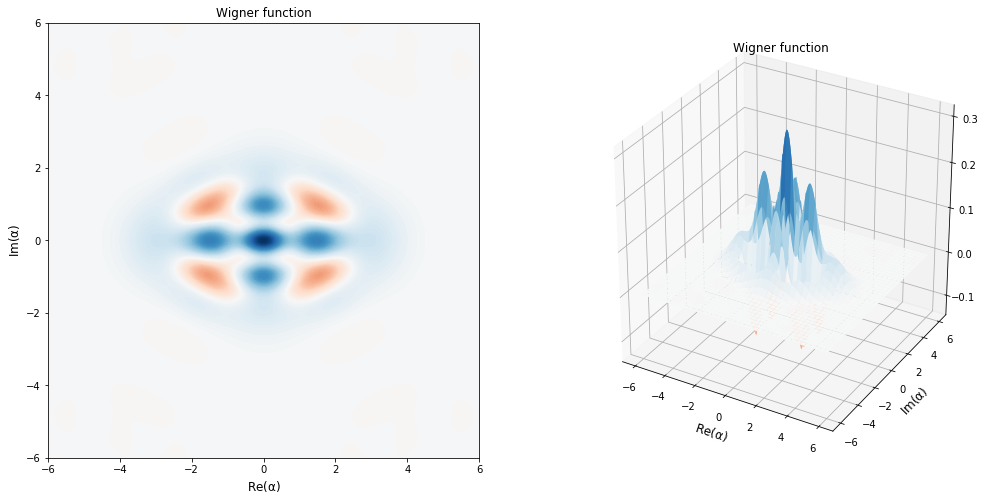

In [37]:
psi = (coherent(N, -2.0) + coherent(N, -1j) + coherent(N, 1j) + coherent(N, 2.0)).unit()
plot_wigner_2d_3d(psi)

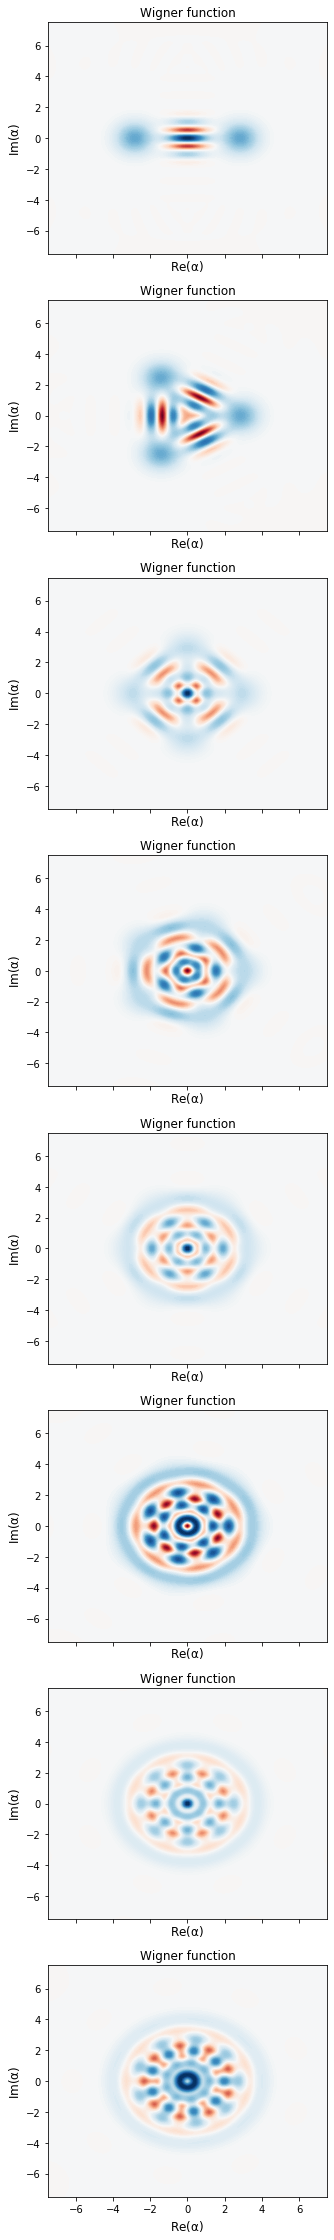

In [38]:
NN = 8

fig, axes = plt.subplots(NN, 1, figsize=(5, 5 * NN), sharex=True, sharey=True) 
for n in range(NN):
    psi = sum([coherent(N, 2*np.exp(2j * np.pi * m / (n + 2))) for m in range(n + 2)]).unit()
    plot_wigner(psi, fig=fig, ax=axes[n])

## Quantum Circuits with QuTiP

'q'

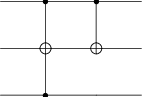

In [39]:
q = QubitCircuit(3, reverse_states=False)
q.add_gate("TOFFOLI", controls=[0, 2], targets=[1])
q.add_gate("CNOT", targets=[1], controls=[0])
display("q",q.png)

'q  updated'

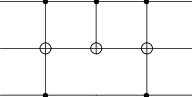

In [40]:
q.add_gate("TOFFOLI", controls=[0, 2], targets=[1])
display("q  updated",q.png)

'q2'

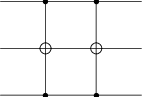

In [41]:
q2 = QubitCircuit(3, reverse_states=False)
q2.add_gate("TOFFOLI", controls=[0, 2], targets=[1])
q2.add_gate("TOFFOLI", controls=[0, 2], targets=[1])
display("q2",q2.png)

In [42]:
U = gate_sequence_product(q.propagators())
U

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]

 ### Time evolution of a dissipative system: Wigner function study

In [ ]:
xvec = np.linspace(-5,5,200)
fig, axes = plt.subplots(2, len(rhot_tot),
                         figsize=(3*len(rhot_tot), nt_sample))
for idx, rhot in enumerate(rhot_tot):
    # trace out the cavity density matrix
    rhot_cavity = ptrace(rhot, 0)
    rhocav_list.append(np.real(rhot_cavity.full()))
    # calculate its wigner function
    W = wigner(rhot_cavity, xvec, xvec,method='laguerre')
    # Wigner method:‘iterative’, ‘laguerre’, ‘fft’
    # plot its wigner function
    wlim = abs(W).max()
    axes[0,idx].contourf(xvec, xvec, W, 100, 
                         norm=mpl.colors.Normalize(-wlim,wlim), 
                         cmap=plt.get_cmap('RdBu'))
    axes[0,idx].set_title(r'$t = %.1f$' % t[idx], fontsize=label_size) 
    # plot its fock-state distribution
    axes[1,idx].bar(np.arange(0, nphot), 
                    np.real(rhot_cavity.diag()), color="blue", alpha=0.8)
    axes[1,idx].set_ylim(0, 1)
    nmaxphot_bar = 10
    axes[1,idx].set_xlim(0, nmaxphot_bar)
plt.show()
plt.close()

In [43]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.3.1
Numpy Version:      1.15.4
Scipy Version:      1.2.1
Cython Version:     0.29.8
Matplotlib Version: 3.1.0
Python Version:     3.7.3
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Darwin (x86_64)
Installation path:  /miniconda3/lib/python3.7/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex file can be easily generated using `qutip.cite()`


## References
[1] J. Robert Johansson, Paul D. Nation, and Franco Nori, QuTiP: An open-source Python framework for the dynamics of open quantum systems, Comp. Phys. Comm. 183, 1760 (2012); QuTiP 2: A Python framework for the dynamics of open quantum systems, Comp. Phys. Comm. . 184, 1234 (2013).

[2] Nathan Shammah and Shahnawaz Ahmed, The rise of open source in quantum physics research, Nature’s Physics Blog “On your Wavelength”, January 9th, 2019, http://blogs.nature.com/onyourwavelength/2019/01/09/the-rise-of-open-source-in-quantum-physics-research/

[3] Nathan Shammah, Neill Lambert, Franco Nori, and Simone De Liberato, Superradiance with local phase-breaking effects, Phys. Rev. A 96, 023863 (2017); Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Simone De Liberato, and Franco Nori, Open quantum systems with local and collective incoherent processes: Efficient numerical simulation using permutational invariance, Phys. Rev. A 98, 063815 (2018). 

[4] Nathan Shammah, A Guide to Building Your Open-Source Science Library, https://github.com/nathanshammah/opensource/blob/master/README.md